In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # used to create the DTC model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import accuracy_score #score the model
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats

#
K Means Clustering Algorithm

- Unsupervised Learning: No labels etc instead find clusters

- Find the K centeroid, calculate the distance of each point from the centeroid, and label them based on distance from each centeroid, keep recalculating the centeroid and data point untill no point changes cluster

- Find best possible K: Called elbow method

- SSEn = Sigma i=0 to n dist(xi-c1)^2, n =1,2,3...
- Then SSE= SSE1+SSE2+...
- Plot the SSE to K and find where SSE becomes 0
- Find the point where the shape of graph looks like an elbow


In [ ]:
income=pd.read_csv('income.csv')
income

Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000

In [ ]:
plt.scatter(income['Age'],income['Income($)'])
plt.show()

In [ ]:
from sklearn.cluster import KMeans


km=KMeans(n_clusters=3)

In [ ]:
km

KMeans(n_clusters=3)

In [ ]:
y_predicted=km.fit_predict(income[['Age','Income($)']])

In [ ]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
income['cluster']=y_predicted

In [ ]:
income

Name  Age  Income($)  cluster
0        Rob   27      70000        2
1    Michael   29      90000        2
2      Mohan   29      61000        0
3     Ismail   28      60000        0
4       Kory   42     150000        1
5     Gautam   39     155000        1
6      David   41     160000        1
7     Andrea   38     162000        1
8       Brad   36     156000        1
9   Angelina   35     130000        1
10    Donald   37     137000        1
11       Tom   26      45000        0
12    Arnold   27      48000        0
13     Jared   28      51000        0
14     Stark   29      49500        0
15    Ranbir   32      53000        0
16    Dipika   40      65000        0
17  Priyanka   41      63000        0
18      Nick   43      64000        0
19      Alia   39      80000        2
20       Sid   41      82000        2
21     Abdul   39      58000        0

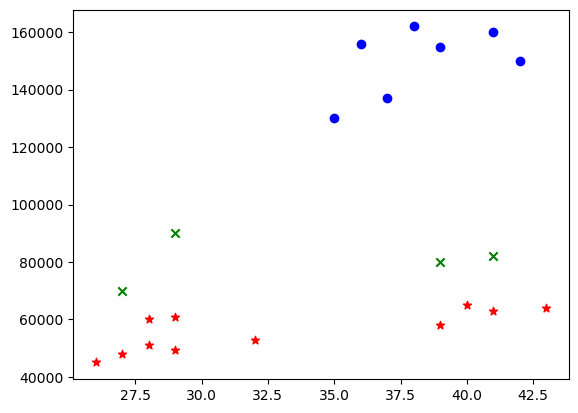

In [ ]:


income_0=income[income.cluster==0]
income_1=income[income.cluster==1]
income_2=income[income.cluster==2]



plt.scatter(income_0.Age,income_0['Income($)'],color='red',marker='*')
plt.scatter(income_1.Age,income_1['Income($)'],color='blue',marker='o')
plt.scatter(income_2.Age,income_2['Income($)'],color='green',marker='x')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
income['Income($)'] = scaler.fit_transform(income[['Income($)']])

income['Age']=scaler.fit_transform(income[['Age']])

income

Name       Age  Income($)  cluster
0        Rob  0.058824   0.213675        2
1    Michael  0.176471   0.384615        2
2      Mohan  0.176471   0.136752        0
3     Ismail  0.117647   0.128205        0
4       Kory  0.941176   0.897436        1
5     Gautam  0.764706   0.940171        1
6      David  0.882353   0.982906        1
7     Andrea  0.705882   1.000000        1
8       Brad  0.588235   0.948718        1
9   Angelina  0.529412   0.726496        1
10    Donald  0.647059   0.786325        1
11       Tom  0.000000   0.000000        0
12    Arnold  0.058824   0.025641        0
13     Jared  0.117647   0.051282        0
14     Stark  0.176471   0.038462        0
15    Ranbir  0.352941   0.068376        0
16    Dipika  0.823529   0.170940        0
17  Priyanka  0.882353   0.153846        0
18      Nick  1.000000   0.162393        0
19      Alia  0.764706   0.299145        2
20       Sid  0.882353   0.316239        2
21     Abdul  0.764706   0.111111        0

In [ ]:
km=KMeans(n_clusters=3)

y_predicted=km.fit_predict(income[['Age','Income($)']])

y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
income['cluster']=y_predicted

income

Name       Age  Income($)  cluster
0        Rob  0.058824   0.213675        0
1    Michael  0.176471   0.384615        0
2      Mohan  0.176471   0.136752        0
3     Ismail  0.117647   0.128205        0
4       Kory  0.941176   0.897436        1
5     Gautam  0.764706   0.940171        1
6      David  0.882353   0.982906        1
7     Andrea  0.705882   1.000000        1
8       Brad  0.588235   0.948718        1
9   Angelina  0.529412   0.726496        1
10    Donald  0.647059   0.786325        1
11       Tom  0.000000   0.000000        0
12    Arnold  0.058824   0.025641        0
13     Jared  0.117647   0.051282        0
14     Stark  0.176471   0.038462        0
15    Ranbir  0.352941   0.068376        0
16    Dipika  0.823529   0.170940        2
17  Priyanka  0.882353   0.153846        2
18      Nick  1.000000   0.162393        2
19      Alia  0.764706   0.299145        2
20       Sid  0.882353   0.316239        2
21     Abdul  0.764706   0.111111        2

In [ ]:


income_0=income[income.cluster==0]
income_1=income[income.cluster==1]
income_2=income[income.cluster==2]



plt.scatter(income_0.Age,income_0['Income($)'],color='red',marker='*')
plt.scatter(income_1.Age,income_1['Income($)'],color='blue',marker='+')
plt.scatter(income_2.Age,income_2['Income($)'],color='green',marker='x')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='o')
plt.show()

In [ ]:
km.cluster_centers_ #centeroids

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(income[['Age','Income($)']])
    sse.append(km.inertia_)

In [ ]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.27901183855347206,
 0.17310821424993494,
 0.13781880133764024,
 0.12504653758905085]

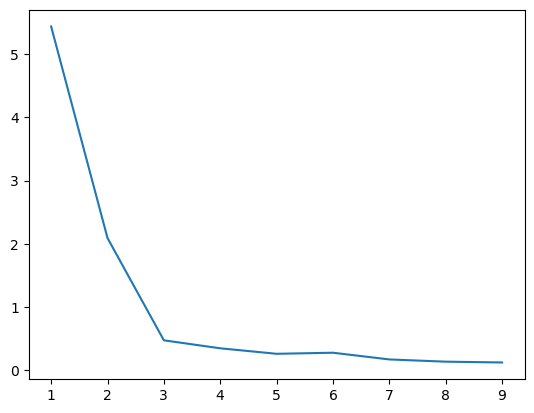

In [ ]:
plt.plot(k_rng,sse)
plt.show() #elbow at k=3

In [ ]:
from sklearn.datasets import load_iris


iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
from sklearn.cluster import KMeans


km=KMeans(n_clusters=3)

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
iris_df['target']=iris.target

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'])
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'])
plt.show()

In [ ]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [ ]:
iris_df=iris_df.drop(['sepal length (cm)','sepal width (cm)','target'],axis='columns')

In [ ]:
y_predicted=km.fit_predict(iris_df[['petal length (cm)','petal width (cm)']])

In [ ]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
iris_df['cluster']=y_predicted

In [ ]:
iris_df

petal length (cm)  petal width (cm)  cluster
0                  1.4               0.2        0
1                  1.4               0.2        0
2                  1.3               0.2        0
3                  1.5               0.2        0
4                  1.4               0.2        0
..                 ...               ...      ...
145                5.2               2.3        1
146                5.0               1.9        1
147                5.2               2.0        1
148                5.4               2.3        1
149                5.1               1.8        1

[150 rows x 3 columns]

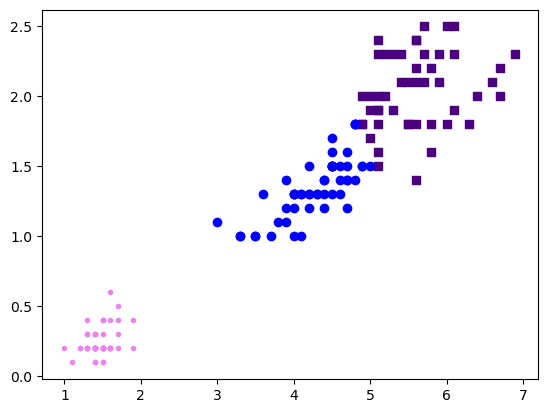

In [ ]:
iris_df_0=iris_df[iris_df.cluster==0]
iris_df_1=iris_df[iris_df.cluster==1]
iris_df_2=iris_df[iris_df.cluster==2]
iris_df_3=iris_df[iris_df.cluster==3]
iris_df_4=iris_df[iris_df.cluster==4]
iris_df_5=iris_df[iris_df.cluster==5]
iris_df_6=iris_df[iris_df.cluster==6]
iris_df_7=iris_df[iris_df.cluster==7]


plt.scatter(iris_df_0['petal length (cm)'],iris_df_0['petal width (cm)'],color='violet',marker='.')
plt.scatter(iris_df_1['petal length (cm)'],iris_df_1['petal width (cm)'],color='indigo',marker=',')
plt.scatter(iris_df_2['petal length (cm)'],iris_df_2['petal width (cm)'],color='blue',marker='o')
plt.scatter(iris_df_3['petal length (cm)'],iris_df_3['petal width (cm)'],color='green',marker='v')
plt.scatter(iris_df_4['petal length (cm)'],iris_df_4['petal width (cm)'],color='yellow',marker='^')
plt.scatter(iris_df_5['petal length (cm)'],iris_df_5['petal width (cm)'],color='orange',marker='<')
plt.scatter(iris_df_6['petal length (cm)'],iris_df_6['petal width (cm)'],color='red',marker='>')
plt.scatter(iris_df_7['petal length (cm)'],iris_df_7['petal width (cm)'],color='pink',marker='1')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
iris_df['petal length (cm)'] = scaler.fit_transform(iris_df[['petal length (cm)']])

iris_df['petal width (cm)']=scaler.fit_transform(iris_df[['petal width (cm)']])

iris_df

petal length (cm)  petal width (cm)  cluster
0             0.067797          0.041667        0
1             0.067797          0.041667        0
2             0.050847          0.041667        0
3             0.084746          0.041667        0
4             0.067797          0.041667        0
..                 ...               ...      ...
145           0.711864          0.916667        1
146           0.677966          0.750000        1
147           0.711864          0.791667        1
148           0.745763          0.916667        1
149           0.694915          0.708333        1

[150 rows x 3 columns]

In [ ]:
y_predicted=km.fit_predict(iris_df[['petal length (cm)','petal width (cm)']])

iris_df['cluster']=y_predicted

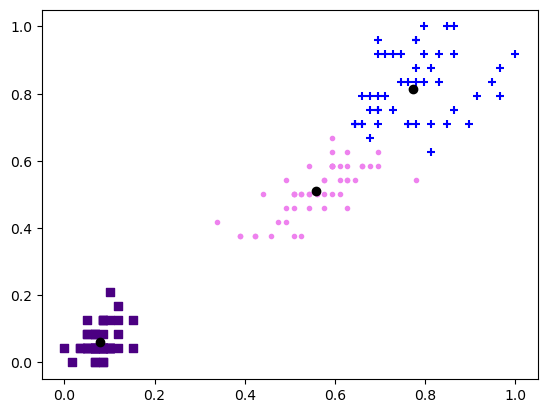

In [ ]:
iris_df_0=iris_df[iris_df.cluster==0]
iris_df_1=iris_df[iris_df.cluster==1]
iris_df_2=iris_df[iris_df.cluster==2]
iris_df_3=iris_df[iris_df.cluster==3]
iris_df_4=iris_df[iris_df.cluster==4]
iris_df_5=iris_df[iris_df.cluster==5]
iris_df_6=iris_df[iris_df.cluster==6]
iris_df_7=iris_df[iris_df.cluster==7]


plt.scatter(iris_df_0['petal length (cm)'],iris_df_0['petal width (cm)'],color='violet',marker='.')
plt.scatter(iris_df_1['petal length (cm)'],iris_df_1['petal width (cm)'],color='indigo',marker=',')
plt.scatter(iris_df_2['petal length (cm)'],iris_df_2['petal width (cm)'],color='blue',marker='+')
plt.scatter(iris_df_3['petal length (cm)'],iris_df_3['petal width (cm)'],color='green',marker='v')
plt.scatter(iris_df_4['petal length (cm)'],iris_df_4['petal width (cm)'],color='yellow',marker='^')
plt.scatter(iris_df_5['petal length (cm)'],iris_df_5['petal width (cm)'],color='orange',marker='<')
plt.scatter(iris_df_6['petal length (cm)'],iris_df_6['petal width (cm)'],color='red',marker='>')
plt.scatter(iris_df_7['petal length (cm)'],iris_df_7['petal width (cm)'],color='pink',marker='1')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='o')
plt.show()

In [ ]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [ ]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(iris_df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

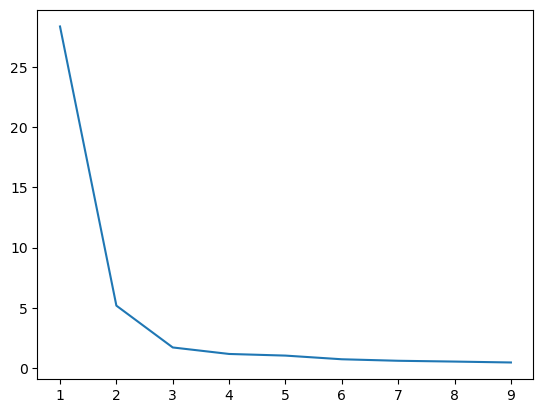

In [ ]:
plt.plot(k_rng,sse)
plt.show()

# 
Naive Bayes Classifier Algorithm

Bayes theorem for conditional probability:P(A given B has occured)= P(B/A has occured)*p(A)/p(B)

Make a naive assumption that features are independent of each other

In [ ]:
titanic=pd.read_csv('titanic copy 2.csv')

titanic

PassengerId                                               Name  Pclass  \
0              1                            Braund, Mr. Owen Harris       3   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2              3                             Heikkinen, Miss. Laina       3   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4              5                           Allen, Mr. William Henry       3   
..           ...                                                ...     ...   
886          887                              Montvila, Rev. Juozas       2   
887          888                       Graham, Miss. Margaret Edith       1   
888          889           Johnston, Miss. Catherine Helen "Carrie"       3   
889          890                              Behr, Mr. Karl Howell       1   
890          891                                Dooley, Mr. Patrick       3   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 12 columns]

In [ ]:
titanic.drop(['Name','PassengerId','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
output=titanic.Survived
input=titanic.drop('Survived',axis='columns')

In [ ]:
dummies=pd.get_dummies(input.Sex)
input=pd.concat([input,dummies],axis='columns')
input.drop('Sex',axis='columns',inplace=True)

In [ ]:
input.isnull().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [ ]:
input.fillna(round(input.Age.mean(),0),inplace=True)

In [ ]:
input.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(input,output,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB # Used when data is normal ie bell curve

model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test) #changes since sample changes in each run

0.7430167597765364

In [ ]:
X_test[:10]

Pclass   Age      Fare  female   male
426       2  28.0   26.0000    True  False
780       3  13.0    7.2292    True  False
770       3  24.0    9.5000   False   True
483       3  63.0    9.5875    True  False
584       3  30.0    8.7125   False   True
318       1  31.0  164.8667    True  False
335       3  30.0    7.8958   False   True
432       2  42.0   26.0000    True  False
436       3  21.0   34.3750    True  False
723       2  50.0   13.0000   False   True

In [ ]:
y_test[:10]

426    1
780    1
770    0
483    1
584    0
318    1
335    0
432    1
436    0
723    0
Name: Survived, dtype: int64

In [ ]:
model.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0])

In [ ]:
model.predict_proba(X_test[:10])

array([[2.14450104e-02, 9.78554990e-01],
       [3.75547637e-02, 9.62445236e-01],
       [9.91141967e-01, 8.85803291e-03],
       [5.35132570e-02, 9.46486743e-01],
       [9.91862047e-01, 8.13795281e-03],
       [2.32138426e-07, 9.99999768e-01],
       [9.91822356e-01, 8.17764434e-03],
       [2.43435946e-02, 9.75656405e-01],
       [3.87726616e-02, 9.61227338e-01],
       [9.83553413e-01, 1.64465870e-02]])

In [ ]:
spam=pd.read_csv('spam.csv')
spam

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [ ]:
spam.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
spam.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
spam['spam']=spam['Category'].apply(lambda x: 1 if x=='spam' else 0)
spam.drop('Category',axis='columns',inplace=True)
spam

Message  spam
0     Go until jurong point, crazy.. Available only ...     0
1                         Ok lar... Joking wif u oni...     0
2     Free entry in 2 a wkly comp to win FA Cup fina...     1
3     U dun say so early hor... U c already then say...     0
4     Nah I don't think he goes to usf, he lives aro...     0
...                                                 ...   ...
5567  This is the 2nd time we have tried 2 contact u...     1
5568               Will ü b going to esplanade fr home?     0
5569  Pity, * was in mood for that. So...any other s...     0
5570  The guy did some bitching but I acted like i'd...     0
5571                         Rofl. Its true to its name     0

[5572 rows x 2 columns]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(spam.Message,spam.spam,test_size=0.2)

#
Count vectorizer technique: Find the unique words in each document, treat each of them as a feature and create it as a column


Corpus: all words in column

Bernoulli(Features are binary(0,1)), Multinomial(discrete data(move rating 1-5)) and Gaussian(Normal distribution)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vector=CountVectorizer()

In [ ]:
X_train_count=vector.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()

model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
X_test[:10]

2065    Pass dis to all ur contacts n see wat u get! R...
2225    I prefer my free days... Tues, wed, fri oso ca...
497     Nope... Think i will go for it on monday... So...
5226        Prabha..i'm soryda..realy..frm heart i'm sory
2468    Is there coming friday is leave for pongal?do ...
2749    Send his number and give reply tomorrow mornin...
3982    Huh i cant thk of more oredi how many pages do...
217      Tired. I haven't slept well the past few nights.
1968    Even i cant close my eyes you are in me our va...
1851    Then cant get da laptop? My matric card wif ü ...
Name: Message, dtype: object

In [ ]:
y_test[:10]

2065    0
2225    0
497     0
5226    0
2468    0
2749    0
3982    0
217     0
1968    0
1851    0
Name: spam, dtype: int64

In [ ]:
X_test_count=vector.transform(X_test)

In [ ]:
model.score(X_test_count,y_test)

0.9847533632286996

In [ ]:
from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
clf.score(X_test,y_test)

0.9847533632286996

In [ ]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.datasets import load_wine


wine=load_wine()

In [ ]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB


model=GaussianNB()

In [ ]:
wine_df=pd.DataFrame(wine.data,columns=wine.feature_names)

In [ ]:
wine_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [ ]:
wine_df['target']=wine.target

In [ ]:
wine_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [ ]:
X=wine_df.drop('target',axis='columns')
y=wine_df.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
clf=Pipeline([
    ('nb' ,MultinomialNB())
])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('nb', MultinomialNB())])

In [ ]:
clf.predict(X_test)

array([0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
clf.score(X_test,y_test)

0.9166666666666666

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()

In [ ]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)


iris_df['target']=iris.target

In [ ]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(iris_df.drop('target',axis='columns'),iris_df.target,test_size=0.2)

In [ ]:
from sklearn.svm import SVC

svc=SVC(C=1,kernel='rbf')

In [ ]:
svc.fit(X_train,y_train)

SVC(C=1)

In [ ]:
svc.score(X_test,y_test)

0.9333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(SVC(kernel='rbf',C=20,gamma='auto'),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [ ]:
kernel=['rbf','linear']

C=[1,10,20]

avg_scores={}


for k in kernel:
    for c in C:
        scores=cross_val_score(SVC(kernel=k,C=c,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[k+' _ '+str(c)]=np.average(scores)

avg_scores

{'rbf _ 1': np.float64(0.9800000000000001),
 'rbf _ 10': np.float64(0.9800000000000001),
 'rbf _ 20': np.float64(0.9666666666666668),
 'linear _ 1': np.float64(0.9800000000000001),
 'linear _ 10': np.float64(0.9733333333333334),
 'linear _ 20': np.float64(0.9666666666666666)}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv=GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear'],
},cv=5,return_train_score=False)

In [ ]:
cv.fit(iris.data,iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [ ]:
cv_df=pd.DataFrame(cv.cv_results_)

In [ ]:
cv_df[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0        1          rbf         0.980000
1        1       linear         0.980000
2       10          rbf         0.980000
3       10       linear         0.973333
4       20          rbf         0.966667
5       20       linear         0.966667

In [ ]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__sklearn_tags__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_can_fit_transform',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_method_params',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_for_step',
 '_get_metadata_reques

In [ ]:
cv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs=RandomizedSearchCV(SVC(gamma='auto'),
{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},
cv=5, return_train_score=False,n_iter=2)

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [ ]:
rs.best_score_

np.float64(0.975)

In [ ]:
rs.best_params_

{'kernel': 'linear', 'C': 20}

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

AttributeError: 'SVC' object has no attribute 'SVC'

In [ ]:
from sklearn.datasets import load_digits

digits=load_digits()

In [ ]:
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(digits.data,digits.target)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will alw

In [ ]:
scores_df=pd.DataFrame(scores)

scores_df

model  best_score  \
0                  svm    0.973850   
1        random_forest    0.941589   
2  logistic_regression    0.924342   
3             gaussian    0.806928   
4          multinomial    0.099053   
5        decision_tree    0.809144   

                                        best_params  
0      {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}  
1                              {'n_estimators': 30}  
2  {'C': 20, 'multi_class': 'ovr', 'solver': 'sag'}  
3                                  {'priors': None}  
4                 {'alpha': 0, 'force_alpha': True}  
5                          {'criterion': 'entropy'}

# 
L1 and L2 regularization

Overfitting = Train too much, fit too much, prediction goes down

Underfitting = Train too less, fit less, prediction goes down

Need to maintain a balance

L1 regularization:
mse=1/n sigma i=1 to n (yi-hO (xi))2 + lambda sigma i=1 to n theta i

L2 regularization:
mse=1/n sigma i=1 to n (yi-hO (xi))2 + lambda sigma i=1 to n absolute(theta i)

In [ ]:
housing=pd.read_csv('Melbourne_housing_FULL.csv')
housing

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

In [ ]:
housing=housing[['Suburb','Rooms','Type','Method','SellerG','Regionname','Propertycount','Distance','CouncilArea','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Price']]

In [ ]:
housing.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
housing[['Propertycount','Distance','Bedroom2','Bathroom','Car']]=housing[['Propertycount','Distance','Bedroom2','Bathroom','Car']].fillna(0)

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_2030/2963825566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing[['Propertycount','Distance','Bedroom2','Bathroom','Car']]=housing[['Propertycount','Distance','Bedroom2','Bathroom','Car']].fillna(0)


In [ ]:
housing.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [ ]:
housing['Landsize']=housing['Landsize'].fillna(housing.groupby('Regionname')['Landsize'].transform('mean'))

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_2030/555037862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Landsize']=housing['Landsize'].fillna(housing.groupby('Regionname')['Landsize'].transform('mean'))


In [ ]:
housing['BuildingArea']=housing['BuildingArea'].fillna(housing.groupby('Regionname')['BuildingArea'].transform('mean'))

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_2030/2946347317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['BuildingArea']=housing['BuildingArea'].fillna(housing.groupby('Regionname')['BuildingArea'].transform('mean'))


In [ ]:
housing['Price']=housing['Price'].fillna(housing.groupby('Regionname')['Price'].transform('mean'))

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_2030/454590218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Price']=housing['Price'].fillna(housing.groupby('Regionname')['Price'].transform('mean'))


In [ ]:
housing.dropna(inplace=True)

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_2030/3970074203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.dropna(inplace=True)


In [ ]:
housing.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [ ]:
housing=pd.get_dummies(housing,drop_first=True)

In [ ]:
housing

Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
0          2         4019.0       2.5       2.0       1.0  1.0  126.000000   
1          2         4019.0       2.5       2.0       1.0  1.0  202.000000   
2          2         4019.0       2.5       2.0       1.0  0.0  156.000000   
3          3         4019.0       2.5       3.0       2.0  1.0    0.000000   
4          3         4019.0       2.5       3.0       2.0  0.0  134.000000   
...      ...            ...       ...       ...       ...  ...         ...   
34852      4         6543.0       6.3       4.0       1.0  3.0  593.000000   
34853      2         6543.0       6.3       2.0       2.0  1.0   98.000000   
34854      2         6543.0       6.3       2.0       1.0  2.0  220.000000   
34855      3         6543.0       6.3       0.0       0.0  0.0  544.647764   
34856      2         6543.0       6.3       2.0       1.0  0.0  250.000000   

       BuildingArea         Price  Suburb_Aberfeldie  ...  \
0        133.123611  8.614840e+05              False  ...   
1        133.123611  1.480000e+06              False  ...   
2         79.000000  1.035000e+06              False  ...   
3        133.123611  8.614840e+05              False  ...   
4        150.000000  1.465000e+06              False  ...   
...             ...           ...                ...  ...   
34852    152.416639  1.480000e+06              False  ...   
34853    104.000000  8.880000e+05              False  ...   
34854    120.000000  7.050000e+05              False  ...   
34855    152.416639  1.140000e+06              False  ...   
34856    103.000000  1.020000e+06              False  ...   

       CouncilArea_Moorabool Shire Council  CouncilArea_Moreland City Council  \
0                                    False                              False   
1                                    False                              False   
2                                    False                              False   
3                                    False                              False   
4                                    False                              False   
...                                    ...                                ...   
34852                                False                              False   
34853                                False                              False   
34854                                False                              False   
34855                                False                              False   
34856                                False                              False   

       CouncilArea_Nillumbik Shire Council  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
34852                                False   
34853                                False   
34854                                False   
34855                                False   
34856                                False   

       CouncilArea_Port Phillip City Council  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   
...                                      ...   
34852                                  False   
34853                                  False   
34854                                  False   
34855                                  False   
34856                                  False   

       CouncilArea_Stonnington City Council  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   

In [ ]:
X=housing.drop('Price',axis=1)
y=housing['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test) #bad fitting

0.5665275280940988

In [ ]:
from sklearn.linear_model import Lasso


lasso_reg=Lasso(alpha=50,max_iter=100,tol=0.1)

lasso_reg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+15, tolerance: 9.496e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.5684494232796657

In [ ]:
lasso_reg.score(X_train,y_train)

0.5566136081925068

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)

ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

0.5656512075973952

In [ ]:
ridge_reg.score(X_train,y_train)

0.5514421689103466

#
K Nearest Neighbour Classification

- Take the center of the cluster, take a k value, whichever the nearest k points are part of, take the highest occurance, the cluster center is equal to that


- Need to find the best K value possible, should not be very small or high



In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()

In [ ]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
iris_df['target']=iris.target

In [ ]:
iris_df[iris_df.target==1].head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
50                7.0               3.2  ...               1.4       1
51                6.4               3.2  ...               1.5       1
52                6.9               3.1  ...               1.5       1
53                5.5               2.3  ...               1.3       1
54                6.5               2.8  ...               1.5       1

[5 rows x 5 columns]

In [ ]:
iris_df[iris_df.target==2].head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
100                6.3               3.3  ...               2.5       2
101                5.8               2.7  ...               1.9       2
102                7.1               3.0  ...               2.1       2
103                6.3               2.9  ...               1.8       2
104                6.5               3.0  ...               2.2       2

[5 rows x 5 columns]

In [ ]:
iris_df[iris_df.target==0].head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [ ]:
df0=iris_df[:50]
df1=iris_df[:100]
df2=iris_df[:150]

In [ ]:
X=iris_df.drop('target',axis='columns')
y=iris_df.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred=knn.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

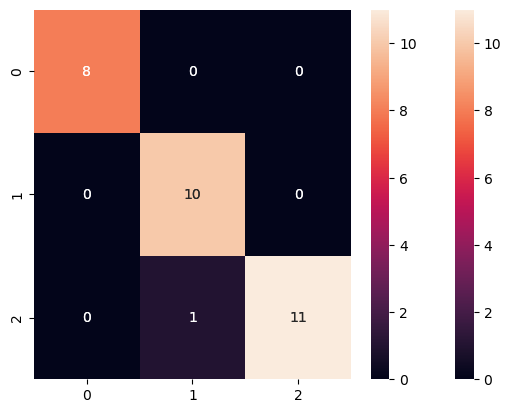

In [ ]:
import seaborn as sns


sns.heatmap(cm,annot=True)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

data=classification_report(y_test,y_pred)

In [ ]:
print(data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.datasets import load_digits

digits=load_digits()

In [ ]:
from narwhals import col


digits_df=pd.DataFrame(digits.data, columns=digits.feature_names)

In [ ]:
digits_df['target']=digits.target

In [ ]:
X=digits_df.drop('target',axis='columns')
y= digits_df.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
knn.score(X_test,y_test)

0.9861111111111112

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

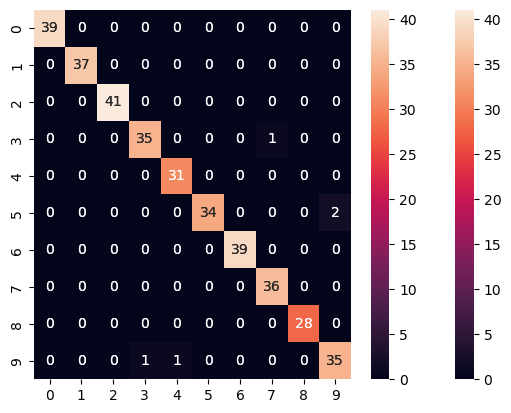

In [ ]:
import seaborn as sns

sns.heatmap(cm,annot=True)

plt.show()

In [ ]:
from sklearn.metrics import classification_report


cr=classification_report(y_test,y_pred)

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        41
           3       0.97      0.97      0.97        36
           4       0.97      1.00      0.98        31
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.99        36
           8       1.00      1.00      1.00        28
           9       0.95      0.95      0.95        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#
Principal component analysis(PCA)

- Drawing axis that covers the most variance in the datapoints. Using that, we can get rid of dimensions. If we have 100 features, we can draw 100 pc's with descending importance

- n_components can contain 6 or even 0.95, which means 95% of features

- We need scale features, accuracy may drop

- Called dimensionality reduction technique, less columns, faster computation, addresses dimensionality curse. 

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()

In [ ]:
digits.data[0].reshape(8,8) #1 dim to 2 dim

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
import matplotlib.pylab as plt

<Figure size 640x480 with 0 Axes>

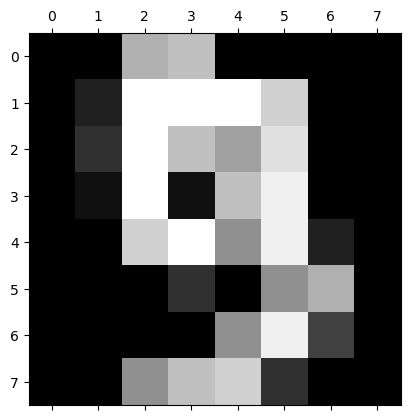

In [ ]:
plt.gray()
plt.matshow(digits.data[9].reshape(8,8))

In [ ]:
import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits_df=pd.DataFrame(digits.data,columns=digits.feature_names)

In [ ]:
digits_df

pixel_0_0  pixel_0_1  pixel_0_2  ...  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0  ...        0.0        0.0        0.0
1           0.0        0.0        0.0  ...       10.0        0.0        0.0
2           0.0        0.0        0.0  ...       16.0        9.0        0.0
3           0.0        0.0        7.0  ...        9.0        0.0        0.0
4           0.0        0.0        0.0  ...        4.0        0.0        0.0
...         ...        ...        ...  ...        ...        ...        ...
1792        0.0        0.0        4.0  ...        9.0        0.0        0.0
1793        0.0        0.0        6.0  ...        6.0        0.0        0.0
1794        0.0        0.0        1.0  ...        6.0        0.0        0.0
1795        0.0        0.0        2.0  ...       12.0        0.0        0.0
1796        0.0        0.0       10.0  ...       12.0        1.0        0.0

[1797 rows x 64 columns]

In [ ]:
digits_df.describe()

pixel_0_0    pixel_0_1  ...    pixel_7_6    pixel_7_7
count     1797.0  1797.000000  ...  1797.000000  1797.000000
mean         0.0     0.303840  ...     2.067891     0.364496
std          0.0     0.907192  ...     4.090548     1.860122
min          0.0     0.000000  ...     0.000000     0.000000
25%          0.0     0.000000  ...     0.000000     0.000000
50%          0.0     0.000000  ...     0.000000     0.000000
75%          0.0     0.000000  ...     2.000000     0.000000
max          0.0     8.000000  ...    16.000000    16.000000

[8 rows x 64 columns]

In [ ]:
X=digits_df
y=digits.target

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

X_scaled #standardscaler=-1 to 1

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.9722222222222222

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(0.95)#retain 95% of useful features, ie 95% of info/variation

In [ ]:
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.explained_variance_ratio_ #which features contribute how much perentage of data target

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train_pca)

LogisticRegression(max_iter=1000)

In [ ]:
model.score(X_test_pca,y_test_pca)

0.9694444444444444

In [ ]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
heart=pd.read_csv('heart.csv')
heart

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[918 rows x 12 columns]

In [ ]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA

encoder=LabelEncoder()
pca=PCA(0.95)
scaler=StandardScaler()
model=DecisionTreeClassifier()


In [ ]:
X=heart.drop('HeartDisease',axis='columns')

In [ ]:
y=heart.HeartDisease

In [ ]:
X['Sex']= encoder.fit_transform(X['Sex'])
X['ChestPainType']= encoder.fit_transform(X['ChestPainType'])
X['RestingECG']= encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina']= encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope']= encoder.fit_transform(X['ST_Slope'])

In [ ]:
X

Age  Sex  ChestPainType  ...  ExerciseAngina  Oldpeak  ST_Slope
0     40    1              1  ...               0      0.0         2
1     49    0              2  ...               0      1.0         1
2     37    1              1  ...               0      0.0         2
3     48    0              0  ...               1      1.5         1
4     54    1              2  ...               0      0.0         2
..   ...  ...            ...  ...             ...      ...       ...
913   45    1              3  ...               0      1.2         1
914   68    1              0  ...               0      3.4         1
915   57    1              0  ...               1      1.2         1
916   57    0              1  ...               0      0.0         1
917   38    1              2  ...               0      0.0         2

[918 rows x 11 columns]

In [ ]:
X_scaled=scaler.fit_transform(X)

In [ ]:
X_pca=pca.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

0.625

In [ ]:
pca.explained_variance_ratio_

array([0.92021836, 0.04913303])

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.875

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

lr.score(X_test,y_test)

0.7010869565217391

#
Bias- How accurately a model can capture a pattern  in training dataset, higher train error = higher bias

Variance -  values are too seperated out, leading to large amount of distance

Best way to get balanced fit= Cross validation, Regularization, Dimensionality Reduction(PCA) and Bagging-Boosting

#
- Resampling with replacement= When creating a dataset with replacement, we pick datapoint and replace it again, pick again, we can get same sample or different and so on

- We train the ML model on each individual resampled dataset. When performing prediction, we perform on all models and take the majority or average. 

- Weak learners: Trained on subset of dataset, so might generalise better and we avoid overfitting

- Bagging also called bootstrap(the creation of subset) and the average/majority part is called aggregation

- Random forest is also called bagged trees(each model is a tree), Bagging is when underlying model can be anything

In [ ]:
diabetes= pd.read_csv('diabetes.csv')

diabetes

Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]

In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [ ]:
diabetes.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
268/500

0.536

In [ ]:
X=diabetes.drop('Outcome',axis='columns')
y=diabetes.Outcome

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


X_scaled=scaler.fit_transform(X)

In [ ]:
X_scaled #is a numpy array

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=10,stratify=y) #stratify helps maintain the ratio if we have too much of a particular value

In [ ]:
X_train.shape

(576, 8)

In [ ]:
X_test.shape

(192, 8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores=cross_val_score(DecisionTreeClassifier(),X_scaled,y,cv=5)

In [ ]:
scores.mean()

np.float64(0.7032340208810797)

In [ ]:
from matplotlib.pylab import rand
from sklearn.ensemble import BaggingClassifier

bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)#creating 100 models and 100 subsets of data, oob score=out of bag, all samples might not be covered so we take those uncovered samples and use it as a test sample, base_estimator renamed to estimator

bc.fit(X_train,y_train)

bc.oob_score_

0.7517361111111112

In [ ]:
bc.score(X_test,y_test)

0.7760416666666666

In [ ]:
bc=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)#creating 100 models and 100 subsets of data, oob score=out of bag, all samples might not be covered so we take those uncovered samples and use it as a test sample, base_estimator renamed to estimator

#Decision tree is unstable classifier

scores=cross_val_score(bc,X,y,cv=5)

scores.mean()

np.float64(0.7578728461081402)

In [ ]:
heart=pd.read_csv('heart.csv')
heart

Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[918 rows x 12 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler #uses Z score method
from sklearn.preprocessing import OneHotEncoder
scaler=StandardScaler()
encoder=LabelEncoder()
X=heart.drop('HeartDisease',axis='columns')
y=heart.HeartDisease

In [ ]:
X['Sex']= encoder.fit_transform(X['Sex'])
X['ChestPainType']= encoder.fit_transform(X['ChestPainType'])
X['RestingECG']= encoder.fit_transform(X['RestingECG'])
X['ExerciseAngina']= encoder.fit_transform(X['ExerciseAngina'])
X['ST_Slope']= encoder.fit_transform(X['ST_Slope'])

In [ ]:
X_scaled=scaler.fit_transform(X)

In [ ]:
from sklearn.svm import SVC

svm = SVC()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
svm.fit(X_train,y_train)

svm.score(X_test,y_test)

0.875

In [ ]:
from sklearn.ensemble import BaggingClassifier

bc=BaggingClassifier(estimator=SVC(),n_estimators=100,random_state=0,max_samples=0.8, oob_score=True)

bc.fit(X_train,y_train)

bc.score(X_test,y_test)

0.875

#
Feature Engineering

In [ ]:
heights=pd.read_csv('heights.csv')
heights

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
9     imran    14.5
10     jose     6.1
11  deepika     5.6
12   yoseph     1.2
13    binod     5.5

In [ ]:
max_threshold=heights['height'].quantile(0.95)
max_threshold

np.float64(9.689999999999998)

In [ ]:
heights[heights['height']>max_threshold]

name  height
9  imran    14.5

In [ ]:
min_threshold=heights['height'].quantile(0.05)
min_threshold

np.float64(3.6050000000000004)

In [ ]:
heights[heights['height']>min_threshold]

name  height
0     mohan     5.9
1     maria     5.2
2     sakib     5.1
3       tao     5.5
4     virat     4.9
5    khusbu     5.4
6    dmitry     6.2
7    selena     6.5
8      john     7.1
9     imran    14.5
10     jose     6.1
11  deepika     5.6
13    binod     5.5

In [ ]:
heights=heights[(heights['height']<max_threshold) & (heights['height']>min_threshold)]

In [ ]:
housing_prices=pd.read_csv('bhp.csv')
housing_prices

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2                4305  
3                6245  
4                4250  
...               ...  
13195            6689  
13196           11111  
13197            5258  
13198           10407  
13199            3090  

[13200 rows x 7 columns]

In [ ]:
housing_prices.describe()

total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

In [ ]:
min_threshold,max_threshold=housing_prices.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [ ]:
housing_prices[housing_prices.price_per_sqft<min_threshold]

location       size  total_sqft  bath  price  bhk  price_per_sqft
665    Yelahanka      3 BHK     35000.0   3.0  130.0    3             371
798        other  4 Bedroom     10961.0   4.0   80.0    4             729
1867       other  3 Bedroom     52272.0   2.0  140.0    3             267
2392       other  4 Bedroom      2000.0   3.0   25.0    4            1250
3934       other      1 BHK      1500.0   1.0   19.5    1            1300
5343       other      9 BHK     42000.0   8.0  175.0    9             416
5417      Ulsoor      4 BHK     36000.0   4.0  450.0    4            1250
5597    JP Nagar      2 BHK      1100.0   1.0   15.0    2            1363
7166   Yelahanka  1 Bedroom     26136.0   1.0  150.0    1             573
7862    JP Nagar      3 BHK     20000.0   3.0  175.0    3             875
8300     Kengeri      1 BHK      1200.0   1.0   14.0    1            1166
9144       other  4 Bedroom     10961.0   4.0   80.0    4             729
11635      Begur      3 BHK      2400.0   3.0   12.0    3             500
12355      other      4 BHK     16335.0   4.0  149.0    4             912

In [ ]:
housing_prices[housing_prices.price_per_sqft>max_threshold]

location       size  total_sqft  bath   price  bhk  \
345                other  3 Bedroom        11.0   3.0    74.0    3   
1005               other      1 BHK        15.0   1.0    30.0    1   
1106               other  5 Bedroom        24.0   2.0   150.0    5   
4044      Sarjapur  Road  4 Bedroom         1.0   4.0   120.0    4   
4924               other      7 BHK         5.0   7.0   115.0    7   
5911         Mysore Road  1 Bedroom        45.0   1.0    23.0    1   
6356        Bommenahalli  4 Bedroom      2940.0   3.0  2250.0    4   
7012               other      1 BHK       650.0   1.0   500.0    1   
7575               other      1 BHK       425.0   1.0   750.0    1   
7799               other      4 BHK      2000.0   3.0  1063.0    4   
8307   Bannerghatta Road      5 BHK      2500.0   4.0  1400.0    5   
9436        Indira Nagar  4 Bedroom      2400.0   5.0  1250.0    4   
11447         Whitefield  4 Bedroom        60.0   4.0   218.0    4   
12328              other  4 Bedroom      4350.0   8.0  2600.0    4   

       price_per_sqft  
345            672727  
1005           200000  
1106           625000  
4044         12000000  
4924          2300000  
5911            51111  
6356            76530  
7012            76923  
7575           176470  
7799            53150  
8307            56000  
9436            52083  
11447          363333  
12328           59770

In [ ]:
housing_prices=housing_prices[(housing_prices['price_per_sqft']<max_threshold) & (housing_prices['price_per_sqft']>min_threshold)]

In [ ]:
housing_prices

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2                4305  
3                6245  
4                4250  
...               ...  
13195            6689  
13196           11111  
13197            5258  
13198           10407  
13199            3090  

[13172 rows x 7 columns]

In [ ]:
ab_nyc=pd.read_csv('AB_NYC_2019.csv')
ab_nyc

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [ ]:
ab_nyc.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [ ]:
ab_nyc.drop(['latitude','name','host_name','longitude','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'],axis='columns',inplace=True)

In [ ]:
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  
0         Private room    149               1  2018-10-19  
1      Entire home/apt    225               1  2019-05-21  
2         Private room    150               3         NaN  
3      Entire home/apt     89               1  2019-07-05  
4      Entire home/apt     80              10  2018-11-19  
...                ...    ...             ...         ...  
48890     Private room     70               2         NaN  
48891     Private room     40               4         NaN  
48892  Entire home/apt    115              10         NaN  
48893      Shared room     55               1         NaN  
48894     Private room     90               7         NaN  

[48895 rows x 8 columns]

In [ ]:
ab_nyc['price_per_night']=ab_nyc['price']/ab_nyc['minimum_nights']

In [ ]:
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  
0         Private room    149               1  2018-10-19       149.000000  
1      Entire home/apt    225               1  2019-05-21       225.000000  
2         Private room    150               3         NaN        50.000000  
3      Entire home/apt     89               1  2019-07-05        89.000000  
4      Entire home/apt     80              10  2018-11-19         8.000000  
...                ...    ...             ...         ...              ...  
48890     Private room     70               2         NaN        35.000000  
48891     Private room     40               4         NaN        10.000000  
48892  Entire home/apt    115              10         NaN        11.500000  
48893      Shared room     55               1         NaN        55.000000  
48894     Private room     90               7         NaN        12.857143  

[48895 rows x 9 columns]

In [ ]:
min_threshold,max_threshold=ab_nyc.price_per_night.quantile([0.001,0.999])

min_threshold,max_threshold

(0.2994111111111111, 2000.0)

In [ ]:
ab_nyc=ab_nyc[(ab_nyc['price_per_night']<max_threshold) & (ab_nyc['price_per_night']>min_threshold)]

In [ ]:
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  
0         Private room    149               1  2018-10-19       149.000000  
1      Entire home/apt    225               1  2019-05-21       225.000000  
2         Private room    150               3         NaN        50.000000  
3      Entire home/apt     89               1  2019-07-05        89.000000  
4      Entire home/apt     80              10  2018-11-19         8.000000  
...                ...    ...             ...         ...              ...  
48890     Private room     70               2         NaN        35.000000  
48891     Private room     40               4         NaN        10.000000  
48892  Entire home/apt    115              10         NaN        11.500000  
48893      Shared room     55               1         NaN        55.000000  
48894     Private room     90               7         NaN        12.857143  

[48796 rows x 9 columns]

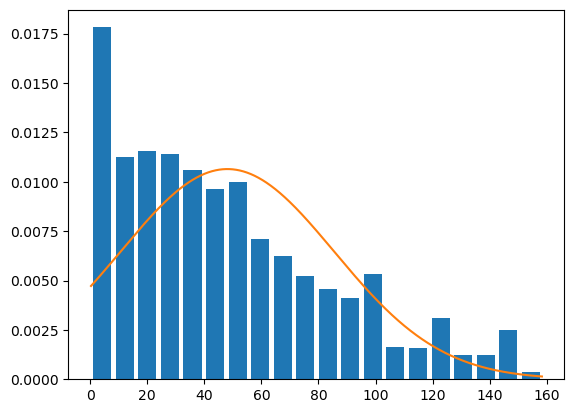

In [ ]:
plt.hist(ab_nyc.price_per_night,bins=20,rwidth=0.8,density=True)
rng=np.arange(ab_nyc.price_per_night.min(),ab_nyc.price_per_night.max(),0.1)
plt.plot(rng,norm.pdf(rng,ab_nyc.price_per_night.mean(),ab_nyc.price_per_night.std()))
plt.show()


In [ ]:
upper_limit=ab_nyc.price_per_night.mean()+3*ab_nyc.price_per_night.std()

lower_limit=ab_nyc.price_per_night.mean()-3*ab_nyc.price_per_night.std()


upper_limit,lower_limit

(np.float64(345.96631063782263), np.float64(-212.79540191033428))

In [ ]:
ab_nyc=ab_nyc[(ab_nyc.price_per_night<upper_limit)&(ab_nyc.price_per_night>lower_limit)]

In [ ]:
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  
0         Private room    149               1  2018-10-19       149.000000  
1      Entire home/apt    225               1  2019-05-21       225.000000  
2         Private room    150               3         NaN        50.000000  
3      Entire home/apt     89               1  2019-07-05        89.000000  
4      Entire home/apt     80              10  2018-11-19         8.000000  
...                ...    ...             ...         ...              ...  
48890     Private room     70               2         NaN        35.000000  
48891     Private room     40               4         NaN        10.000000  
48892  Entire home/apt    115              10         NaN        11.500000  
48893      Shared room     55               1         NaN        55.000000  
48894     Private room     90               7         NaN        12.857143  

[48072 rows x 9 columns]

In [ ]:
ab_nyc['zscore']=(ab_nyc.price_per_night-ab_nyc.price_per_night.mean())/ab_nyc.price_per_night.std()
ab_nyc

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/958622252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['zscore']=(ab_nyc.price_per_night-ab_nyc.price_per_night.mean())/ab_nyc.price_per_night.std()


id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  \
0         Private room    149               1  2018-10-19       149.000000   
1      Entire home/apt    225               1  2019-05-21       225.000000   
2         Private room    150               3         NaN        50.000000   
3      Entire home/apt     89               1  2019-07-05        89.000000   
4      Entire home/apt     80              10  2018-11-19         8.000000   
...                ...    ...             ...         ...              ...   
48890     Private room     70               2         NaN        35.000000   
48891     Private room     40               4         NaN        10.000000   
48892  Entire home/apt    115              10         NaN        11.500000   
48893      Shared room     55               1         NaN        55.000000   
48894     Private room     90               7         NaN        12.857143   

         zscore  
0      1.619743  
1      2.981900  
2     -0.154646  
3      0.544356  
4     -0.907417  
...         ...  
48890 -0.423493  
48891 -0.871571  
48892 -0.844686  
48893 -0.065030  
48894 -0.820362  

[48072 rows x 10 columns]

In [ ]:
ab_nyc[ab_nyc.zscore<3]

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  \
0         Private room    149               1  2018-10-19       149.000000   
1      Entire home/apt    225               1  2019-05-21       225.000000   
2         Private room    150               3         NaN        50.000000   
3      Entire home/apt     89               1  2019-07-05        89.000000   
4      Entire home/apt     80              10  2018-11-19         8.000000   
...                ...    ...             ...         ...              ...   
48890     Private room     70               2         NaN        35.000000   
48891     Private room     40               4         NaN        10.000000   
48892  Entire home/apt    115              10         NaN        11.500000   
48893      Shared room     55               1         NaN        55.000000   
48894     Private room     90               7         NaN        12.857143   

         zscore  
0      1.619743  
1      2.981900  
2     -0.154646  
3      0.544356  
4     -0.907417  
...         ...  
48890 -0.423493  
48891 -0.871571  
48892 -0.844686  
48893 -0.065030  
48894 -0.820362  

[47056 rows x 10 columns]

In [ ]:
ab_nyc=ab_nyc[(ab_nyc.zscore>-3)&(ab_nyc.zscore<3)]
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  \
0         Private room    149               1  2018-10-19       149.000000   
1      Entire home/apt    225               1  2019-05-21       225.000000   
2         Private room    150               3         NaN        50.000000   
3      Entire home/apt     89               1  2019-07-05        89.000000   
4      Entire home/apt     80              10  2018-11-19         8.000000   
...                ...    ...             ...         ...              ...   
48890     Private room     70               2         NaN        35.000000   
48891     Private room     40               4         NaN        10.000000   
48892  Entire home/apt    115              10         NaN        11.500000   
48893      Shared room     55               1         NaN        55.000000   
48894     Private room     90               7         NaN        12.857143   

         zscore  
0      1.619743  
1      2.981900  
2     -0.154646  
3      0.544356  
4     -0.907417  
...         ...  
48890 -0.423493  
48891 -0.871571  
48892 -0.844686  
48893 -0.065030  
48894 -0.820362  

[47056 rows x 10 columns]

In [ ]:
from re import I


min=ab_nyc.price_per_night.min()
max=ab_nyc.price_per_night.max()

Q1=ab_nyc.price_per_night.quantile(0.25)
Q3=ab_nyc.price_per_night.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
ab_nyc=ab_nyc[(ab_nyc.price_per_night>lower_limit)&(ab_nyc.price_per_night<upper_limit)]


In [ ]:
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
5          5099      7322           Manhattan         Murray Hill   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  \
0         Private room    149               1  2018-10-19       149.000000   
2         Private room    150               3         NaN        50.000000   
3      Entire home/apt     89               1  2019-07-05        89.000000   
4      Entire home/apt     80              10  2018-11-19         8.000000   
5      Entire home/apt    200               3  2019-06-22        66.666667   
...                ...    ...             ...         ...              ...   
48890     Private room     70               2         NaN        35.000000   
48891     Private room     40               4         NaN        10.000000   
48892  Entire home/apt    115              10         NaN        11.500000   
48893      Shared room     55               1         NaN        55.000000   
48894     Private room     90               7         NaN        12.857143   

         zscore  
0      1.619743  
2     -0.154646  
3      0.544356  
4     -0.907417  
5      0.144073  
...         ...  
48890 -0.423493  
48891 -0.871571  
48892 -0.844686  
48893 -0.065030  
48894 -0.820362  

[45059 rows x 10 columns]

In [ ]:
ab_nyc['price_per_night_log']=np.log(ab_nyc['price_per_night'])

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/115348836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['price_per_night_log']=np.log(ab_nyc['price_per_night'])


In [ ]:
ab_nyc['price_per_night_sqrt'] = np.sqrt(ab_nyc['price_per_night'])

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/3121841398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['price_per_night_sqrt'] = np.sqrt(ab_nyc['price_per_night'])


In [ ]:
ab_nyc['price_per_night_cbrt'] = np.cbrt(ab_nyc['price_per_night'])

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/2989957373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['price_per_night_cbrt'] = np.cbrt(ab_nyc['price_per_night'])


In [ ]:
ab_nyc['price_per_night_boxcox'], _ = stats.boxcox(ab_nyc['price_per_night'])

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/4164339801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['price_per_night_boxcox'], _ = stats.boxcox(ab_nyc['price_per_night'])


In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
ab_nyc['price_per_night_yeojohnson'] = pt.fit_transform(ab_nyc[['price_per_night']])

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/3338460166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['price_per_night_yeojohnson'] = pt.fit_transform(ab_nyc[['price_per_night']])


In [ ]:
from scipy.stats.mstats import winsorize
ab_nyc['price_per_night_wins'] = winsorize(ab_nyc['price_per_night'], limits=[0.01, 0.01])  # cap 1% tails

/var/folders/26/4l177j4904v4mq62y47bw48r0000gn/T/ipykernel_17939/1318113454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_nyc['price_per_night_wins'] = winsorize(ab_nyc['price_per_night'], limits=[0.01, 0.01])  # cap 1% tails


In [ ]:
ab_nyc

id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
5          5099      7322           Manhattan         Murray Hill   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  minimum_nights last_review  price_per_night  \
0         Private room    149               1  2018-10-19       149.000000   
2         Private room    150               3         NaN        50.000000   
3      Entire home/apt     89               1  2019-07-05        89.000000   
4      Entire home/apt     80              10  2018-11-19         8.000000   
5      Entire home/apt    200               3  2019-06-22        66.666667   
...                ...    ...             ...         ...              ...   
48890     Private room     70               2         NaN        35.000000   
48891     Private room     40               4         NaN        10.000000   
48892  Entire home/apt    115              10         NaN        11.500000   
48893      Shared room     55               1         NaN        55.000000   
48894     Private room     90               7         NaN        12.857143   

         zscore  price_per_night_log  price_per_night_sqrt  \
0      1.619743             5.003946             12.206556   
2     -0.154646             3.912023              7.071068   
3      0.544356             4.488636              9.433981   
4     -0.907417             2.079442              2.828427   
5      0.144073             4.199705              8.164966   
...         ...                  ...                   ...   
48890 -0.423493             3.555348              5.916080   
48891 -0.871571             2.302585              3.162278   
48892 -0.844686             2.442347              3.391165   
48893 -0.065030             4.007333              7.416198   
48894 -0.820362             2.553900              3.585686   

       price_per_night_cbrt  price_per_night_boxcox  \
0                  5.301459               15.470041   
2                  3.684031                9.219383   
3                  4.464745               12.188690   
4                  2.000000                3.204241   
5                  4.054801               10.617515   
...                     ...                     ...   
48890              3.271066                7.690039   
48891              2.154435                3.728475   
48892              2.257179                4.080809   
48893              3.802952                9.665341   
48894              2.342690                4.376129   

       price_per_night_yeojohnson  price_per_night_wins  
0                        1.931547            149.000000  
2                        0.308365             50.000000  
3                        1.083455             89.000000  
4                       -1.271321              8.000000  
5                        0.674222             66.666667  
...                           ...                   ...  
48890                   -0.093467             35.000000  
48891                   -1.135344             10.000000  
48892                   -1.043395             11.500000  
48893                    0.425228             55.000000  
48894                   -0.966076             12.857143  

[45059 rows x 16 columns]

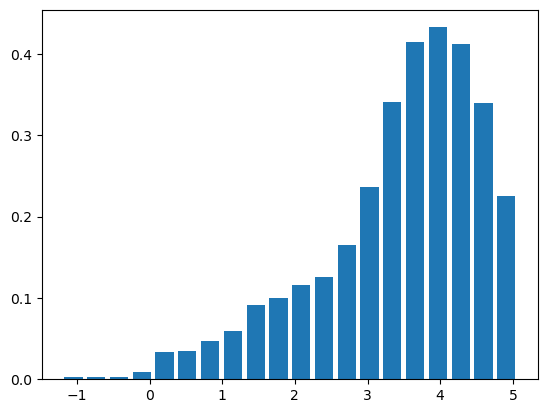

In [ ]:
plt.hist(ab_nyc.price_per_night_log,bins=20,rwidth=0.8,density=True)
plt.show()

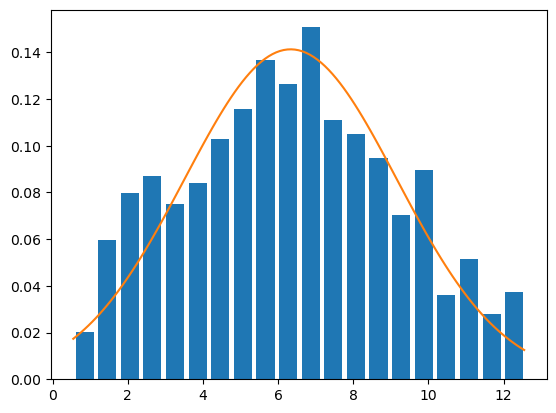

In [ ]:
plt.hist(ab_nyc.price_per_night_sqrt,bins=20,rwidth=0.8,density=True)
rng=np.arange(ab_nyc.price_per_night_sqrt.min(),ab_nyc.price_per_night_sqrt.max(),0.1)
plt.plot(rng,norm.pdf(rng,ab_nyc.price_per_night_sqrt.mean(),ab_nyc.price_per_night_sqrt.std()))
plt.show()

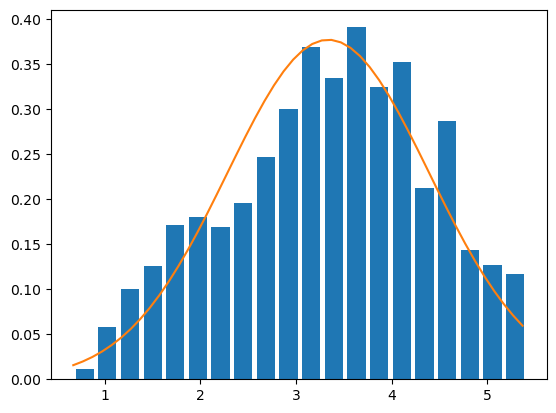

In [ ]:
plt.hist(ab_nyc.price_per_night_cbrt,bins=20,rwidth=0.8,density=True)
rng=np.arange(ab_nyc.price_per_night_cbrt.min(),ab_nyc.price_per_night_cbrt.max(),0.1)
plt.plot(rng,norm.pdf(rng,ab_nyc.price_per_night_cbrt.mean(),ab_nyc.price_per_night_cbrt.std()))
plt.show()

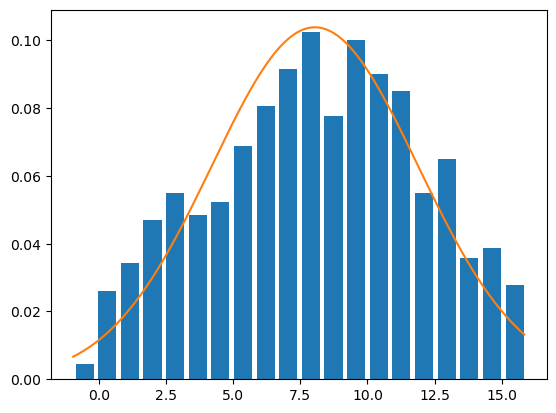

In [ ]:
plt.hist(ab_nyc.price_per_night_boxcox,bins=20,rwidth=0.8,density=True)
rng=np.arange(ab_nyc.price_per_night_boxcox.min(),ab_nyc.price_per_night_boxcox.max(),0.1)
plt.plot(rng,norm.pdf(rng,ab_nyc.price_per_night_boxcox.mean(),ab_nyc.price_per_night_boxcox.std()))
plt.show()

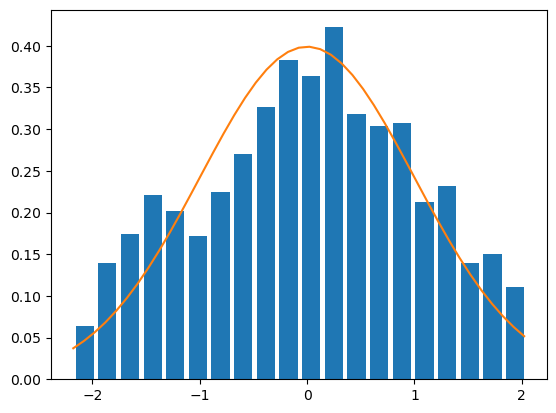

In [ ]:
plt.hist(ab_nyc.price_per_night_yeojohnson,bins=20,rwidth=0.8,density=True)
rng=np.arange(ab_nyc.price_per_night_yeojohnson.min(),ab_nyc.price_per_night_yeojohnson.max(),0.1)
plt.plot(rng,norm.pdf(rng,ab_nyc.price_per_night_yeojohnson.mean(),ab_nyc.price_per_night_yeojohnson.std()))
plt.show()

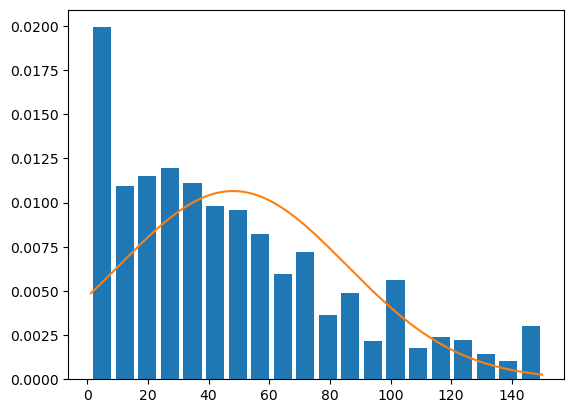

In [ ]:
plt.hist(ab_nyc.price_per_night_wins,bins=20,rwidth=0.8,density=True)
rng=np.arange(ab_nyc.price_per_night_wins.min(),ab_nyc.price_per_night_wins.max(),0.1)
plt.plot(rng,norm.pdf(rng,ab_nyc.price_per_night_wins.mean(),ab_nyc.price_per_night_wins.std()))
plt.show()